# Задание 6
Проверка статистических гипотез.
Найти 3 набора оригинальных данных (напрммер, на Kaggle).
Для каждого набора высказать статистическую гипотезу.
Проверить гипотезы с помощью критериев, рассказанных в лекции (Шапиро, Манна-Уитни, Стюдента и т.д.).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

from scipy import stats


In [2]:
df = pd.read_csv('Air_Passenger_Traffic_per_Month__Port_Authority_of_NY_NJ__Beginning_1977.csv', sep=",", header = 0, index_col=False)
df.head()

,Airport Code,Year,Month,Domestic Passengers,International Passengers,Total Passengers
0,ACY,2015,Feb,96431,65,96496
1,ACY,2015,Aug,108700,1932,110632
2,ACY,2015,Sep,82268,315,82583
3,ACY,2015,Jan,98177,90,98267
4,ACY,2015,Jul,109247,1894,111141


In [3]:
df.shape

(1584, 6)

In [4]:
df.dtypes

Airport Code                object
Year                         int64
Month                       object
Domestic Passengers          int64
International Passengers     int64
Total Passengers             int64
dtype: object

Проверим на нормальность

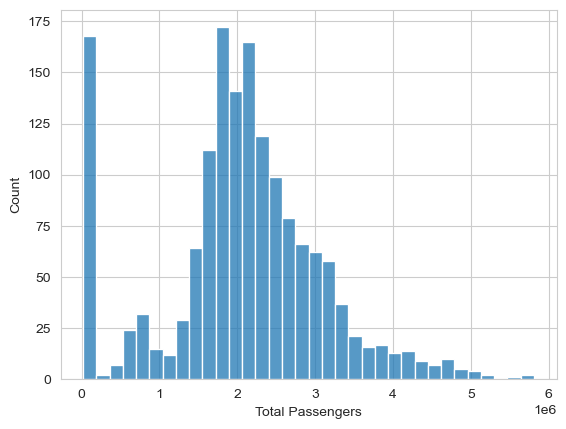

In [5]:
sns.histplot(df['Total Passengers'])
plt.show()

По гистограмме видим, что распределение отличается от нормального

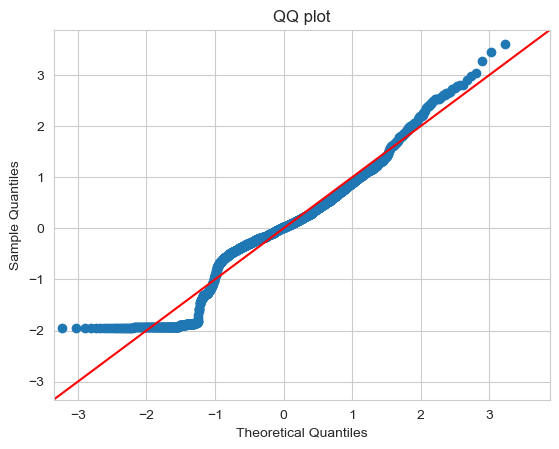

In [6]:
sm.qqplot(df['Total Passengers'], line='45', fit=True)
plt.title('QQ plot')
plt.show()

График QQ plot также показывает отличие от нормальности

Критерий Шапиро-Уилка:
$H_0$: распределение нормально
$H_1$: распределение отличается от нормального

Возьмем уровень значимости равный 0.05

In [7]:
res = stats.shapiro((df['Total Passengers']))
print('p-value: ', res[1])

p-value:  2.616653066549097e-20


p-value < 0.05
Отклоняем нулевую гипотезу о нормальности распределения

In [8]:
df = pd.read_csv('AB_NYC_2019.csv', sep=";", header = 0, index_col=False)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,1,2,55,2019-06-24,2.56,4,127
1,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,1,3,0,NaN,NaN,1,0
2,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,1,4,1,2018-01-06,0.05,4,28
3,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,1,2,16,2019-05-18,0.71,5,0
4,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,1,2,12,2017-10-27,0.53,2,0


In [9]:
df.shape

(48895, 16)

In [10]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Проверим отличаются ли цены на дома в Бруклине и в Куинсе

In [11]:
x = df[df['neighbourhood_group'] == 'Brooklyn']['price']
y = df[df['neighbourhood_group'] == 'Queens']['price']
x.name, y.name = 'Brooklyn', 'Queens'

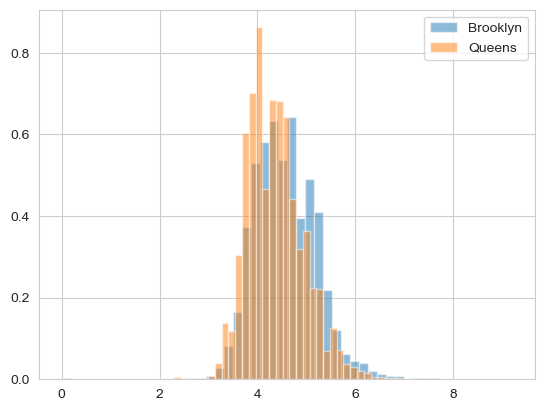

In [12]:
np.log(x).hist(alpha=0.5, bins=50, density=True)
np.log(y).hist(alpha=0.5, bins=50, density=True)
plt.legend([x.name, y.name])

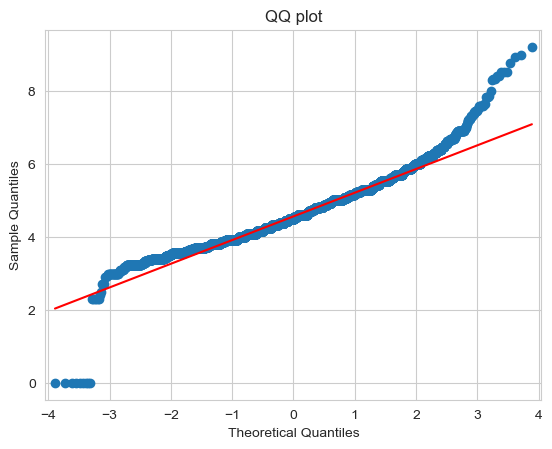

In [13]:
sm.qqplot(np.log(x), line='s')
plt.title('QQ plot')
plt.show()

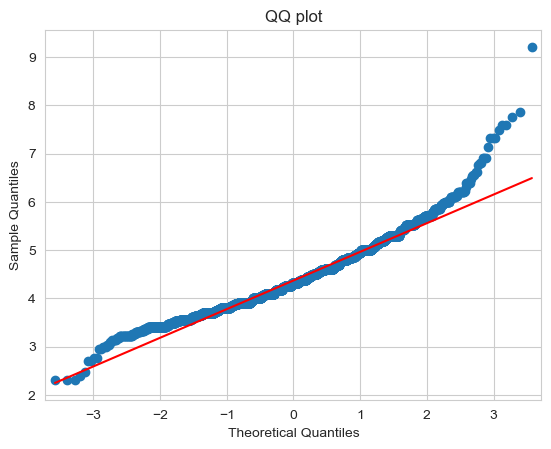

In [14]:
sm.qqplot(np.log(y), line='s')
plt.title('QQ plot')
plt.show()

Распределение не нормально.
Применяем критерий Манна-Уитни

$H_0$: распределение признака в первой выборке соответствует распределению признака во второй выборке

$H_1$: распределение признака в первой выборке соответствует распределению признака во второй выборке

Уровень значимость = 0.05

In [15]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 2.1432196923384333e-100


Уровень значимости < 0.05
Отвергаем нулевую гипотезу

Значит цены на дома в Бруклине и в Куинсе статистически значимо отличаются

In [16]:
df = pd.read_csv('StudentsPerformance.csv.xls', sep=",", header = 0, index_col=False)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.shape

(1000, 8)

In [18]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Хотим выяснить, влияет ли прохождение подготовительного курса на оценку по математике

In [19]:
x = df[df['test preparation course'] == 'none']['math score']
y = df[df['test preparation course'] == 'completed']['math score']
x.name, y.name = 'none', 'completed'

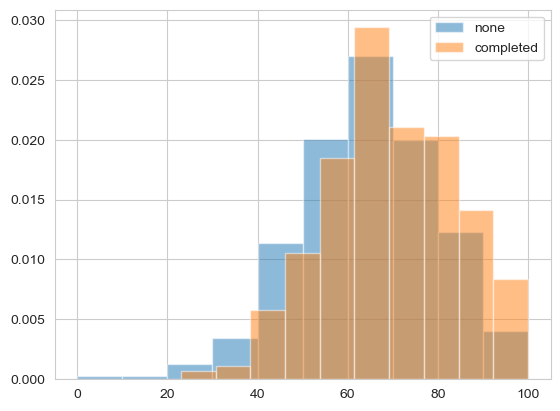

In [20]:
x.hist(alpha=0.5, density=True)
y.hist(alpha=0.5, density=True)
plt.legend([x.name, y.name])
plt.show()

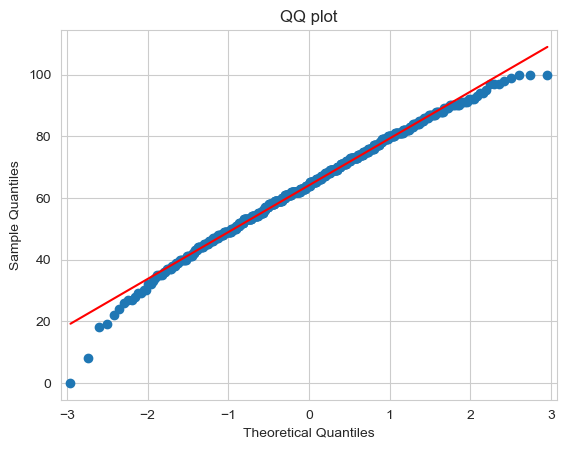

In [21]:
sm.qqplot(x, line='s')
plt.title('QQ plot')
plt.show()

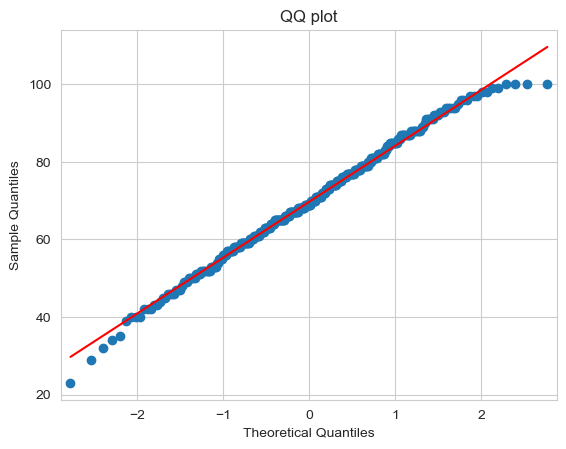

In [22]:
sm.qqplot(y, line='s')
plt.title('QQ plot')
plt.show()

In [23]:
res = stats.shapiro(x)
print('p-value: ', res[1])

p-value:  0.0017582917353138328


In [24]:
res = stats.shapiro(y)
print('p-value: ', res[1])

p-value:  0.1393701285123825


Данные условно нормальны. Проверим c помощью критерия Флигнера-Килина, равны ли дисперсии.

In [25]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.5205707515493214


Значение p-value низкое, поэтому гипотезу о равенстве дисперсий отвергаем. В двух выборках находятся разные наблюдаемые объекты, то есть выборки несвязные. Итого, гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=False```.

In [26]:
res = stats.ttest_ind(x, y, equal_var=False)
print('p-value: ', res[1])

p-value:  1.0425616722069513e-08


Значение p-value низкое, поэтому гипотезу о равенстве средних отвергаем.

То есть подготовительный курс влияет на оценку по математике